In [11]:
import pandas as pd 
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import SVG
from IPython.display import display

In [12]:
#Берем файл со всеми дескрипторами (Из той папки, где код)
data = pd.read_excel('C://Users//plato//Documents//Python Scripts//CH3CN_final//CH3CN_ALL.xlsx', index_col=0) 

In [13]:
merged_df = data[['CATS2D_06_PL:(Dragon7)', 'VE1sign_G/D:(Dragon7)', 'R3p+:(Dragon7)', 'F01[C-N]', 'F04[C-N]', 'VE2sign_G/D', 'B06[N-O]', 'LnLn']]

In [14]:
#Сохраняем в отдельный файл (он сохранится в ту папку, в которой этот код)
merged_df.to_excel(f'CH3CN_MLR.xlsx', index=True)

In [15]:
#Загружаем наш сохраненный файл
Porphs_data = pd.read_excel('C://Users//plato//Documents//Python Scripts//CH3CN_final//CH3CN_MLR.xlsx', index_col=0) 
Porphs_data.head()

,CATS2D_06_PL:(Dragon7),VE1sign_G/D:(Dragon7),R3p+:(Dragon7),F01[C-N],F04[C-N],VE2sign_G/D,B06[N-O],LnLn
SR No,,,,,,,,
2,0,0.005,0.019,4,6,0.00015,0,0.078814
3,1,0.216,0.026,4,10,0.00501,0,0.160491
4,1,0.173,0.022,5,13,0.00385,1,1.468449
5,1,0.221,0.022,5,12,0.00490,0,0.730410
6,0,0.229,0.022,5,11,0.00510,0,0.770710


In [16]:
feature_names = Porphs_data.columns.values[:-1]

In [17]:
feature_names 

array(['CATS2D_06_PL:(Dragon7)', 'VE1sign_G/D:(Dragon7)',
       'R3p+:(Dragon7)', 'F01[C-N]', 'F04[C-N]', 'VE2sign_G/D',
       'B06[N-O]'], dtype=object)

In [18]:
#Выделяем Х и у 
y = Porphs_data.LnLn
X = Porphs_data.drop(['LnLn'], axis=1)

In [19]:
#Сохдаем корелляционную матрицу
corr_matrix = Porphs_data.corr().abs()
corr_matrix

,CATS2D_06_PL:(Dragon7),VE1sign_G/D:(Dragon7),R3p+:(Dragon7),F01[C-N],F04[C-N],VE2sign_G/D,B06[N-O],LnLn
CATS2D_06_PL:(Dragon7),1.000000,0.389934,0.634341,0.287956,0.589027,0.557343,0.239548,0.101469
VE1sign_G/D:(Dragon7),0.389934,1.000000,0.320192,0.112830,0.258259,0.945248,0.168234,0.308983
R3p+:(Dragon7),0.634341,0.320192,1.000000,0.137546,0.517022,0.517413,0.070223,0.082682
F01[C-N],0.287956,0.112830,0.137546,1.000000,0.404031,0.081162,0.085922,0.564307
F04[C-N],0.589027,0.258259,0.517022,0.404031,1.000000,0.390767,0.040480,0.318307
VE2sign_G/D,0.557343,0.945248,0.517413,0.081162,0.390767,1.000000,0.216237,0.126716
B06[N-O],0.239548,0.168234,0.070223,0.085922,0.040480,0.216237,1.000000,0.143480
LnLn,0.101469,0.308983,0.082682,0.564307,0.318307,0.126716,0.143480,1.000000


In [20]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
X = X.drop(Porphs_data[to_drop], axis=1)
from sklearn import preprocessing
# normalize the data attributes
X = pd.DataFrame(preprocessing.scale(X), columns=X.columns, index=X.index)

In [21]:
#делаем тренировочную выборку
X_train = X.drop([5, 8, 13, 20, 48, 25, 16, 74], axis=0)
#делаем тренировочную целевую переменную
y_train = y.drop([5, 8, 13, 20, 48, 25, 16, 74], axis=0)
#делаем тестовую выборку
X_test = X.loc[[5, 8, 13, 20, 48, 25, 16, 74]]
#делаем тестовую целевую переменную
y_test = y.loc[[5, 8, 13, 20, 48, 25, 16, 74]]

In [22]:
#Это для проверки на генетическом алгоритме
#X_train.to_excel(f'X_train.xlsx', index=True)
#y_train.to_excel(f'y_train.xlsx', index=True)

In [23]:
#Загружаем линейную регрессию
from sklearn import linear_model
#from sklearn.feature_selection import SelectFromModel
lm = linear_model.LinearRegression()

#selector = SelectFromModel(lm)
#features_important = selector.fit_transform(X_train, y_train)
#model = lm.fit(features_important, y_train)

In [24]:
#Обучаем линейную регрессию
#from sklearn.linear_model import LinearRegression
#regressor = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [25]:
#Коэффициент наклона
lm.intercept_

1.3401643963491017

In [26]:
#Коэффициенты дескрипторов
lm.coef_

array([ 0.74562573,  1.14360872,  0.17823064,  0.91168208, -0.49813696,
       -0.99441918,  0.32897972])

In [27]:
#Считаем R2train и R2test, в R2 всегда сперва реальные, потом предсказанные
from sklearn.metrics import r2_score
y_pred = lm.predict(X_train)
y_pred_test = lm.predict(X_test)
R2_train = r2_score(y_train, y_pred)
R2_test = r2_score(y_test, y_pred_test)
print("Train R^2:", R2_train)
print("Test R^2:", R2_test)

Train R^2: 0.752647108427533
Test R^2: 0.7386190882254728


In [28]:
R2_adj = 1 - ( 1-R2_train ) * ( len(y_pred) - 1 ) / ( len(y_pred) - X_train.shape[1] - 1 )
print("Train R^2 adjusted:", R2_adj)

Train R^2 adjusted: 0.67736579360113


In [29]:
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

In [30]:
mape_train = calculate_mape(y_train, y_pred)
mape_test = calculate_mape(y_test, y_pred_test)
print(f"MAPE for the training dataset: {mape_train}")
print(f"MAPE for the test dataset: {mape_test}")

MAPE for the training dataset: 78.71042412299667
MAPE for the test dataset: 67.03340995047321


In [31]:
#Максимальная ошибка предсказания
import sklearn.metrics as metrics
MaxAE = metrics.max_error(y_train, y_pred)  #max_error metric calculates the maximum residual error
print(f"MaxAE: {MaxAE}")
#Средняя абсолютная ошибка предсказания
MAE = metrics.mean_absolute_error(y_train, y_pred) #Mean absolute error regression loss
print(f"MAE: {MAE}")

MaxAE: 1.5060907695187775
MAE: 0.3473511736367996


In [32]:
#Среднеквадратичная ошибка 
from sklearn.metrics import mean_squared_error
metrics.mean_squared_error(y_train, y_pred) #Mean squared error regression loss
from math import sqrt
rmse_train = sqrt(mean_squared_error(y_train, y_pred))
print(f"RMSE_train: {rmse_train}")
rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE_test: {rmse_test}")

RMSE_train: 0.4660549880196216
RMSE_test: 0.4266050738941094


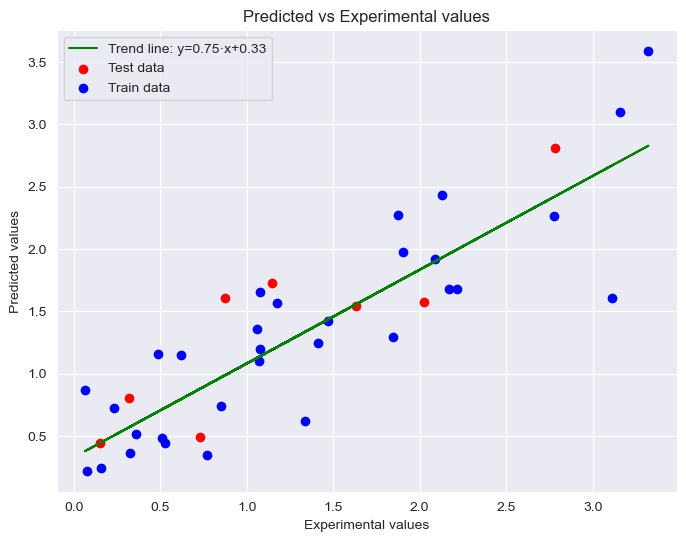

intercept: 0.3292129918430941
slope: 0.7526471084275334


In [35]:
import matplotlib.pyplot as plt
# Строим график всех данных с аппроксимацией
plt.figure(figsize=(8, 6))
# Выполнение линейной аппроксимации
slope, intercept = np.polyfit(y_train, y_pred, 1)
plt.plot(y_train, slope * y_train + intercept, color='green', label='Trend line: y=0.75·x+0.33')
plt.scatter(y_test, y_pred_test, color='red', label='Test data')
plt.scatter(y_train, y_pred, color='blue', label='Train data')
plt.title('Predicted vs Experimental values')
plt.xlabel('Experimental values')
plt.ylabel('Predicted values')
plt.legend()
plt.grid(True)
plt.show()

print(f"intercept: {intercept}")
print(f"slope: {slope}")

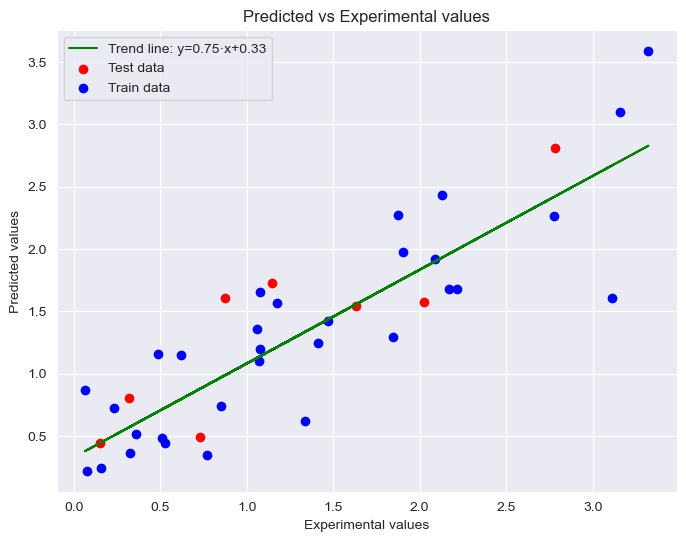

In [36]:
#Сохраняет в PDF в высоком качестве
import matplotlib.pyplot as plt

# Строим график всех данных с аппроксимацией
plt.figure(figsize=(8, 6))
# Выполнение линейной аппроксимации (подпись к графику делал руками)
slope, intercept = np.polyfit(y_train, y_pred, 1)
plt.plot(y_train, slope * y_train + intercept, color='green', label='Trend line: y=0.75·x+0.33')
plt.scatter(y_test, y_pred_test, color='red', label='Test data')
plt.scatter(y_train, y_pred, color='blue', label='Train data')
plt.title('Predicted vs Experimental values')
plt.xlabel('Experimental values')
plt.ylabel('Predicted values')
plt.legend()
plt.grid(True)

# Сохранение графика в PDF
plt.savefig('CH3CN_MLR_graph.pdf')

# Отображение графика (необязательно)
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler
# Получаем стандартизированные коэффициенты регрессии
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
lm.fit(X_train_scaled, y_train)
standardized_coefficients = lm.coef_
# Определим относительный вклад каждого дескриптора
relative_contributions = np.abs(standardized_coefficients)
# Нормализуем относительный вклад в процентах
total_contribution = np.sum(relative_contributions)
relative_contributions_percent = (relative_contributions / total_contribution) * 100
# Выведите относительный вклад в процентах для каждого дескриптора
for i, contribution_percent in enumerate(relative_contributions_percent):
    print(f"Descriptor {i + 1}: {contribution_percent:.2f}%")

Descriptor 1: 15.26%
Descriptor 2: 23.89%
Descriptor 3: 3.42%
Descriptor 4: 19.39%
Descriptor 5: 10.27%
Descriptor 6: 21.06%
Descriptor 7: 6.71%


In [38]:
#Считаем q2
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score as r2
# Assuming you have X_train and y_train in a correct form
lm2 = linear_model.LinearRegression()
y_pred = cross_val_predict(lm2, X_train, y_train, cv=len(X_train))
q2 = r2(y_train,y_pred)
print(f"q2: {q2}")

q2: 0.5635361109377264


In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from alibi.explainers import ALE, plot_ale

In [40]:
lm_ale = ALE(lm.predict, feature_names=feature_names, target_names=['LnLn'])

In [41]:
X_train1 = X_train.to_numpy()

In [42]:
lm_exp = lm_ale.explain(X_train1)

In [70]:
import matplotlib.pyplot as plt
from alibi.explainers import ALE

# Предположим, что у вас уже есть обученная модель и данные

# Создание объяснения ALE (предположим, что lm_exp уже определен)
# lm_exp = ALE(...) 

# Построение графика
plot_ale(lm_exp, n_cols=4, fig_kw={'figwidth':14, 'figheight': 7})

# Сохранение графика в PDF
plt.savefig('CH3CN_MLR_ale_plot.pdf', format='pdf')

# Если необходимо закрыть окно с графиком после сохранения
plt.close()


In [44]:
lm.coef_

array([ 0.72953688,  1.14229468,  0.16355964,  0.92698271, -0.49100523,
       -1.00696497,  0.32058829])

In [45]:
slopes = np.array([((v[-1]-v[0])/(f[-1]-f[0])).item() for v, f in zip(lm_exp.ale_values, lm_exp.feature_values)])

In [46]:
slopes

array([ 0.72953688,  1.14229468,  0.16355964,  0.92698271, -0.49100523,
       -1.00696497,  0.32058829])

In [47]:
np.allclose(lm.coef_, slopes)

True

In [48]:
import shap
shap.initjs()

In [49]:
lin_reg_explainer1 = shap.LinearExplainer(lm, X_train)

In [50]:
sample_idx = 0

# Используем .iloc для доступа к строке по индексу
shap_vals = lin_reg_explainer1.shap_values(X_test.iloc[sample_idx])

print("Expected/Base Value : ", lin_reg_explainer1.expected_value)
print("Shap Values for Sample %d : " % sample_idx, shap_vals)
print("\n")

# Преобразуем строку в numpy array и используем метод reshape
print("Prediction From Model : ", lm.predict(X_test.iloc[sample_idx].values.reshape(1, -1))[0])
print("Prediction From Adding SHAP Values to Base Value : ", lin_reg_explainer1.expected_value + shap_vals.sum())

Expected/Base Value :  1.3212511764040193
Shap Values for Sample 0 :  [-0.41901703  0.49331539  0.04426899 -0.02009502  0.01766346 -0.85491178
 -0.10226048]


Prediction From Model :  0.48021470319723214
Prediction From Adding SHAP Values to Base Value :  0.4802147031972319


In [51]:
lin_reg_explainer2 = shap.LinearExplainer(lm, X_train, feature_perturbation="correlation_dependent")

C:\Users\plato\anaconda3\Lib\site-packages\shap\explainers\_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

In [52]:
sample_idx = 0

# Используем .iloc для доступа к строке по индексу
shap_vals = lin_reg_explainer2.shap_values(X_test.iloc[sample_idx].values.reshape(1, -1))[0]

print("Base Value : ", lin_reg_explainer2.expected_value)
print("Shap Values for Sample %d : " % sample_idx, shap_vals)
print("\n")

# Преобразуем строку в numpy array и используем метод reshape
print("Prediction From Model : ", lm.predict(X_test.iloc[sample_idx].values.reshape(1, -1))[0])
print("Prediction From Adding SHAP Values to Base Value : ", lin_reg_explainer2.expected_value + shap_vals.sum())


Base Value :  1.3212511764040193
Shap Values for Sample 0 :  [-0.12630355 -0.22181881 -0.05968644 -0.12264044 -0.01854572 -0.17231347
 -0.11972804]


Prediction From Model :  0.48021470319723214
Prediction From Adding SHAP Values to Base Value :  0.48021470319723514


In [53]:
explainer = shap.LinearExplainer(lm, X_train)

In [54]:
shap_values = explainer.shap_values(X_test)

In [72]:
import shap
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть обученная модель, X_test и shap_values

# Создаем фигуру
plt.figure()

# Построение SHAP summary plot
shap.summary_plot(shap_values, X_test, show=False)  # Убедитесь, что show=False

# Сохранение графика в PDF
plt.savefig('CH3CN_MLR_SHAP_test_plot.pdf', format='pdf')

# Закрытие окна с графиком после сохранения
plt.close()


In [56]:
explainer = shap.LinearExplainer(lm, X_train)
shap_test = explainer(X_test)
print(f"Shap values length: {len(shap_test)}\n")
print(f"Sample shap value:\n{shap_test[0]}")

Shap values length: 8

Sample shap value:
.values =
array([-0.41901703,  0.49331539,  0.04426899, -0.02009502,  0.01766346,
       -0.85491178, -0.10226048])

.base_values =
1.3212511764040193

.data =
array([-0.52312197,  0.42687743,  0.20772108, -0.08615569, -0.05004087,
        0.82129429, -0.3380617 ])


In [57]:
# Вывод ожидаемого (базового) значения
print(f"Expected value: {explainer.expected_value:.1f}")

# Вывод среднего значения целевой переменной в обучающем наборе
print(f"Average target value (training data): {y_train.mean():.1f}")

# Вывод базового значения SHAP
unique_base_values = np.unique(shap_test.base_values)
print(f"Base value: {unique_base_values[0]:.1f}")


Expected value: 1.3
Average target value (training data): 1.3
Base value: 1.3


In [58]:
(shap_test.data == X_test).describe()

,CATS2D_06_PL:(Dragon7),VE1sign_G/D:(Dragon7),R3p+:(Dragon7),F01[C-N],F04[C-N],VE2sign_G/D,B06[N-O]
count,8,8,8,8,8,8,8
unique,1,1,1,1,1,1,1
top,True,True,True,True,True,True,True
freq,8,8,8,8,8,8,8


In [59]:
pd.DataFrame(shap_test.data, columns=shap_test.feature_names, 
             index=X_test.index)

,CATS2D_06_PL:(Dragon7),VE1sign_G/D:(Dragon7),R3p+:(Dragon7),F01[C-N],F04[C-N],VE2sign_G/D,B06[N-O]
SR No,,,,,,,
5,-0.523122,0.426877,0.207721,-0.086156,-0.050041,0.821294,-0.338062
8,-0.523122,0.353491,2.522327,0.585859,-0.607639,0.928152,-0.338062
13,-0.894063,1.055903,0.207721,-0.758170,-0.607639,0.933494,2.958040
20,-0.894063,-0.831174,0.497047,1.257873,-0.328840,-0.722794,-0.338062
48,-0.523122,1.622027,0.207721,1.257873,0.228758,0.960209,-0.338062
25,0.218760,0.080913,0.497047,-0.758170,-0.607639,0.383179,-0.338062
16,-0.894063,-1.103752,0.207721,1.257873,-0.328840,-0.904451,-0.338062
74,2.444406,-1.449717,-2.396211,-0.758170,2.737950,-1.540252,-0.338062


In [60]:
shap_df = pd.DataFrame(shap_test.values, 
                       columns=shap_test.feature_names, 
                       index=X_test.index)
shap_df

,CATS2D_06_PL:(Dragon7),VE1sign_G/D:(Dragon7),R3p+:(Dragon7),F01[C-N],F04[C-N],VE2sign_G/D,B06[N-O]
SR No,,,,,,,
5,-0.419017,0.493315,0.044269,-0.020095,0.017663,-0.854912,-0.102260
8,-0.419017,0.409487,0.422845,0.602851,0.291447,-0.962513,-0.102260
13,-0.689632,1.211848,0.044269,-0.643041,0.291447,-0.967893,0.954431
20,-0.689632,-0.943751,0.091591,1.225796,0.154555,0.699931,-0.102260
48,-0.419017,1.858528,0.044269,1.225796,-0.119228,-0.994794,-0.102260
25,0.122213,0.098122,0.091591,-0.643041,0.291447,-0.413745,-0.102260
16,-0.689632,-1.255115,0.044269,1.225796,0.154555,0.882853,-0.102260
74,1.745904,-1.650308,-0.381629,-0.643041,-1.351255,1.523083,-0.102260


In [61]:
# Получаем ожидаемое значение как скаляр (если это действительно нужно)
expected_value = explainer.expected_value

# Выполняем операции с предсказаниями, ожидаемым значением и суммой SHAP
predictions = lm.predict(X_test)
shap_sum = shap_df.sum(axis=1)

# Проверяем близость между предсказаниями и целевым выражением
np.isclose(predictions, expected_value + shap_sum)

C:\Users\plato\anaconda3\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ True,  True,  True,  True,  True,  True,  True,  True])

In [62]:
columns = shap_df.apply(np.abs).mean()\
                 .sort_values(ascending=False).index

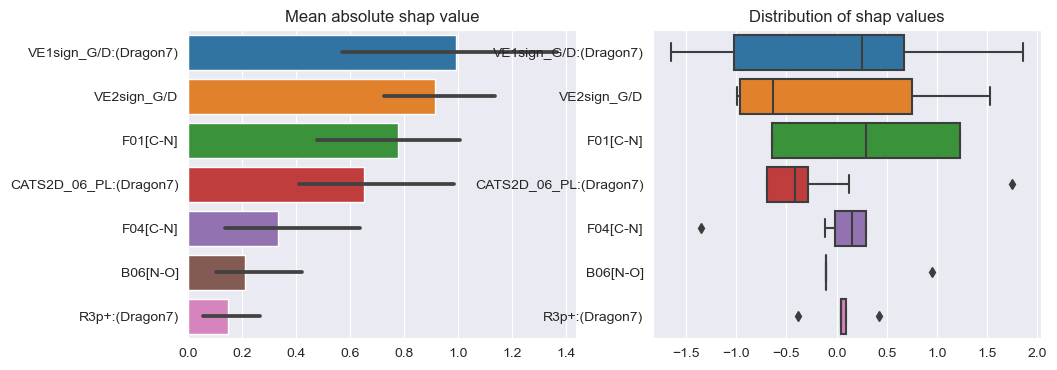

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(11,4))
sns.barplot(data=shap_df[columns].apply(np.abs), orient='h', 
            ax=ax[0])
ax[0].set_title("Mean absolute shap value")
sns.boxplot(data=shap_df[columns], orient='h', ax=ax[1])
ax[1].set_title("Distribution of shap values");

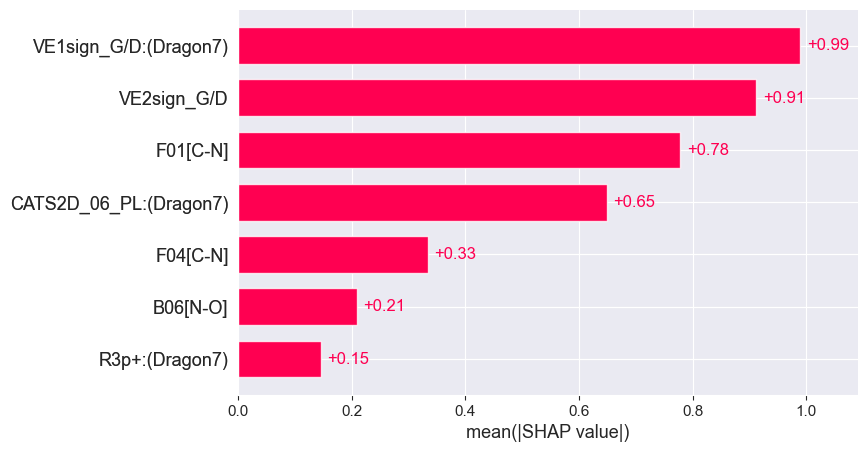

In [64]:
shap.plots.bar(shap_test)

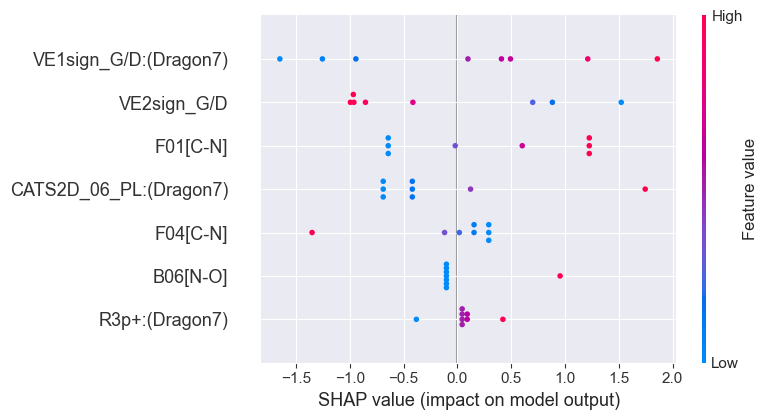

In [65]:
shap.summary_plot(shap_test)

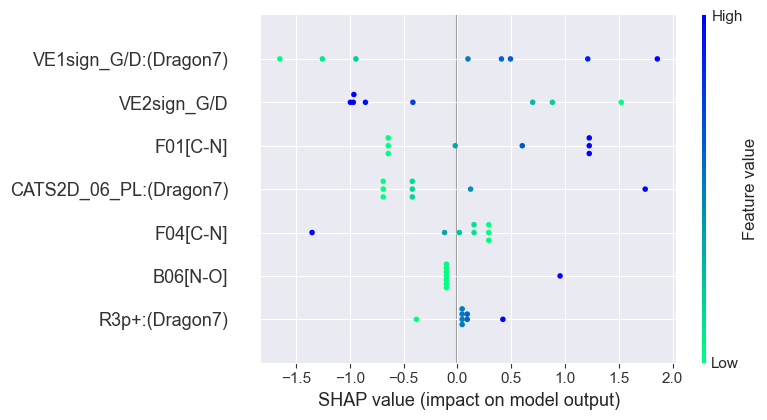

In [66]:
shap.summary_plot(shap_test, cmap=plt.get_cmap("winter_r"))

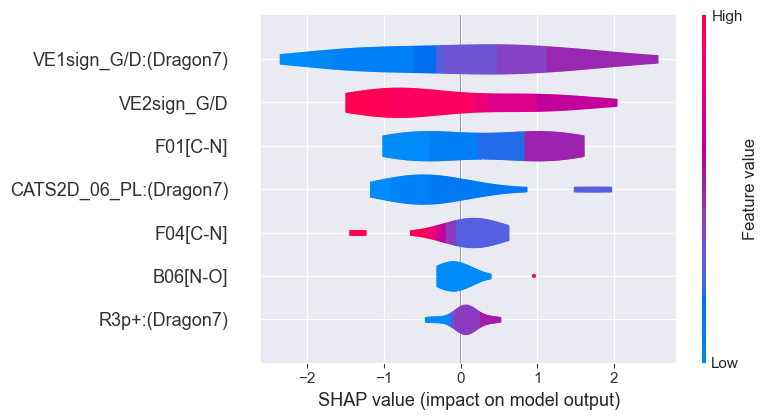

In [67]:
shap.summary_plot(shap_test, plot_type='violin')

In [68]:
shap.force_plot(explainer.expected_value, shap_test.values, 
                X_test)